In [1]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [2]:
df=pd.read_excel(r"E:\AIMLGLIM\Capstone\LD_BFSI_01 - NBFC Foreclosure\NBFC Loan Transaction Data.xlsx")

In [3]:
df.head()

,AGREEMENTID,AUTHORIZATIONDATE,BALANCE_EXCESS,BALANCE_TENURE,CITY,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,...,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,FORECLOSURE
0,11220001,2010-08-29,0.0,0,MUMBAI,45,13.421934,13.734072,13.421934,1,...,1.159366e+07,7994.273589,0.0,7994.273589,HL,10901100.0,NaN,NaN,45,1
1,11220002,2010-09-15,0.0,99,MUMBAI,38,13.734072,13.734072,13.734072,0,...,6.942656e+06,100504.575864,0.0,100504.575864,HL,10901100.0,NaN,NaN,38,1
2,11220006,2010-11-02,0.0,231,MUMBAI,81,15.606900,16.231176,15.606900,2,...,9.392115e+05,5947.630536,0.0,5947.630536,HL,10901101.0,NaN,NaN,81,1
3,11220008,2010-10-06,0.0,0,THANE,91,11.236968,13.734072,11.236968,4,...,9.979637e+06,60322.180776,0.0,60322.180776,HL,10901100.0,NaN,NaN,91,1
4,11220010,2010-10-26,0.0,215,MUMBAI,89,14.982624,15.606900,14.982624,2,...,5.552847e+05,27732.787464,0.0,27732.787464,HL,10901101.0,NaN,NaN,90,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

In [5]:
df.describe()

,AGREEMENTID,BALANCE_EXCESS,BALANCE_TENURE,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,CURRENT_TENOR,CUSTOMERID,...,ORIGNAL_TENOR,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,SCHEMEID,MOB,FORECLOSURE
count,2.001200e+04,2.001200e+04,20012.000000,20012.000000,20012.000000,20012.000000,20012.000000,20012.000000,20012.000000,1.973100e+04,...,20012.000000,2.001200e+04,2.001200e+04,2.001200e+04,2.001200e+04,2.001200e+04,2.001200e+04,1.973100e+04,20012.000000,20012.000000
mean,1.123665e+07,7.899598e+04,172.824605,17.269089,14.781931,14.900248,14.301873,0.758095,190.093694,1.201741e+07,...,183.297322,5.212982e+06,9.890547e+05,8.667637e+05,5.780447e+04,2.594779e+02,5.754499e+04,1.090122e+07,18.813612,0.089696
std,9.626440e+03,1.348636e+06,64.004484,16.486279,2.485858,2.480029,2.677014,1.134323,58.559953,9.490084e+03,...,44.600262,1.152135e+07,3.026053e+06,3.469758e+07,3.776647e+05,1.096744e+04,3.769718e+05,8.890519e+01,16.541875,0.285753
min,1.122000e+07,0.000000e+00,0.000000,0.000000,9.901017,10.425409,-5.056636,0.000000,6.000000,1.200100e+07,...,14.000000,-7.506479e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.090110e+07,0.000000,0.000000
25%,1.122833e+07,0.000000e+00,136.000000,6.000000,12.797658,13.109796,12.423092,0.000000,166.000000,1.200921e+07,...,180.000000,1.428919e+06,1.253319e+05,2.341834e+04,4.768264e+03,0.000000e+00,4.755012e+03,1.090111e+07,7.000000,0.000000
50%,1.123661e+07,0.000000e+00,174.000000,12.000000,14.545631,14.670486,13.734072,0.000000,180.000000,1.201740e+07,...,180.000000,2.394655e+06,3.097248e+05,7.878650e+04,1.069602e+04,0.000000e+00,1.067945e+04,1.090126e+07,13.000000,0.000000
75%,1.124496e+07,5.742235e+01,216.000000,25.000000,16.231176,16.543314,16.168748,2.000000,228.000000,1.202562e+07,...,228.000000,4.551204e+06,7.954680e+05,2.917810e+05,3.187879e+04,0.000000e+00,3.180536e+04,1.090129e+07,26.000000,0.000000
max,1.125335e+07,7.555600e+07,674.000000,98.000000,25.095895,37.456560,24.034626,9.000000,713.000000,1.203390e+07,...,300.000000,3.818367e+08,1.230362e+08,4.885217e+09,3.177540e+07,1.074264e+06,3.177540e+07,1.090146e+07,98.000000,1.000000


In [6]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 20012 
The number of columns (variables) is 53


In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(20012, 53)


In [8]:
df.isnull().sum()

AGREEMENTID                                0
AUTHORIZATIONDATE                          0
BALANCE_EXCESS                             0
BALANCE_TENURE                             0
CITY                                       0
COMPLETED_TENURE                           0
CURRENT_INTEREST_RATE                      0
CURRENT_INTEREST_RATE_MAX                  0
CURRENT_INTEREST_RATE_MIN                  0
CURRENT_INTEREST_RATE_CHANGES              0
CURRENT_TENOR                              0
CUSTOMERID                               281
DIFF_AUTH_INT_DATE                         0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN         0
DIFF_EMI_AMOUNT_MAX_MIN                   89
DIFF_ORIGINAL_CURRENT_INTEREST_RATE        0
DIFF_ORIGINAL_CURRENT_TENOR                0
DPD                                        0
DUEDAY                                     0
EMI_AMOUNT                                 0
EMI_DUEAMT                                 0
EMI_OS_AMOUNT                              0
EMI_RECEIV

In [9]:
dif=df.MAX_EMI_AMOUNT - df.MIN_EMI_AMOUNT

In [10]:
dif.isnull().sum()

89

In [11]:
df['DIFF_EMI_AMOUNT_MAX_MIN']=df['DIFF_EMI_AMOUNT_MAX_MIN'].replace(dif)

In [12]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 20012 
The number of columns (variables) is 53


In [13]:
df.isnull().sum()

AGREEMENTID                                0
AUTHORIZATIONDATE                          0
BALANCE_EXCESS                             0
BALANCE_TENURE                             0
CITY                                       0
COMPLETED_TENURE                           0
CURRENT_INTEREST_RATE                      0
CURRENT_INTEREST_RATE_MAX                  0
CURRENT_INTEREST_RATE_MIN                  0
CURRENT_INTEREST_RATE_CHANGES              0
CURRENT_TENOR                              0
CUSTOMERID                               281
DIFF_AUTH_INT_DATE                         0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN         0
DIFF_EMI_AMOUNT_MAX_MIN                  132
DIFF_ORIGINAL_CURRENT_INTEREST_RATE        0
DIFF_ORIGINAL_CURRENT_TENOR                0
DPD                                        0
DUEDAY                                     0
EMI_AMOUNT                                 0
EMI_DUEAMT                                 0
EMI_OS_AMOUNT                              0
EMI_RECEIV

In [14]:
testdf= df.filter(['SCHEMEID','ORIGNAL_INTEREST_RATE','ORIGNAL_TENOR'], axis=1)

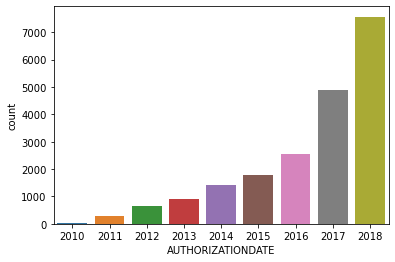

In [15]:
sns.countplot(df['AUTHORIZATIONDATE'].dt.year)

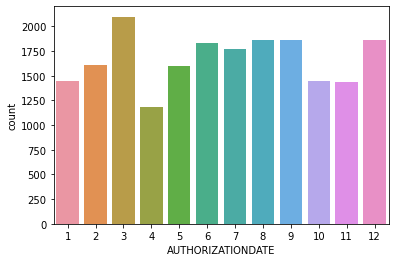

In [16]:
sns.countplot(df['AUTHORIZATIONDATE'].dt.month)

In [17]:
len(df['CITY'].unique())

272

In [18]:
df['CITY'].value_counts().head(10)

MUMBAI       2028
HYDERABAD    1567
AHMEDABAD    1396
SURAT        1391
PUNE         1202
CHENNAI      1001
BANGALORE     880
THANE         735
DELHI         623
RAJKOT        558
Name: CITY, dtype: int64

In [19]:
foreclosed=df[df['FORECLOSURE']==1]

In [20]:
foreclosed['CITY'].value_counts().head(10)

MUMBAI        353
HYDERABAD     165
PUNE          151
CHENNAI       109
AHMEDABAD      90
BANGALORE      81
DELHI          76
THANE          75
COIMBATORE     69
SURAT          59
Name: CITY, dtype: int64

In [21]:
ratio_def=foreclosed['CITY'].value_counts()/df['CITY'].value_counts()

In [22]:
ratio_def.sort_values(ascending=False).head(50)

NATHAM             1.000000
VEPPAMPATTU        1.000000
CHIDAMBARAM        1.000000
SABARKANTHA        0.250000
DHARMAPURI         0.250000
SRIPERUMBUDUR      0.250000
TIRUCHIRAPPALLI    0.236025
MEDAK              0.200000
NADIAD             0.200000
ERODE              0.191111
MUMBAI             0.174063
GHAZIABAD          0.173913
THANJAVUR          0.171053
KUMBAKONAM         0.166667
MADURAI            0.165644
COIMBATORE         0.163507
BARODA             0.161290
TIRUNELVELI        0.160000
KOVILPATTI         0.153846
CHENGALPET         0.148148
ARAKKONAM          0.136364
TUTICORIN          0.134921
KRISHNAGIRI        0.133333
FARIDABAD          0.129412
TRICHY             0.128205
PUNE               0.125624
MAHBOOBNAGAR       0.125000
GURGAON            0.122449
DELHI              0.121990
PERAMBALUR         0.120000
THIRUVARUR         0.111111
CHENNAI            0.108891
NOIDA              0.106796
HYDERABAD          0.105297
KURNOOL            0.104651
VIJAYAWADA         0

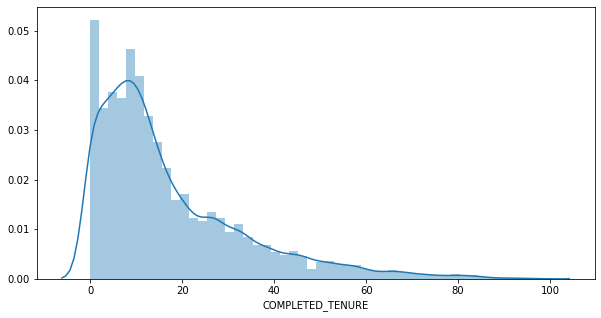

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(df['COMPLETED_TENURE'])


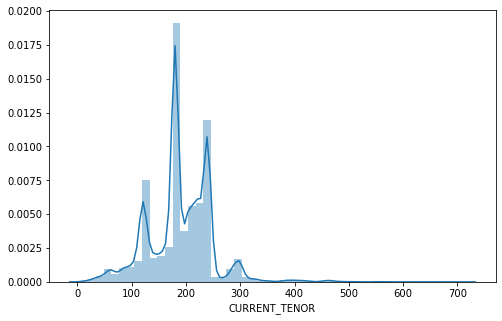

In [24]:
plt.figure(figsize=(8,5))
sns.distplot(df['CURRENT_TENOR'])

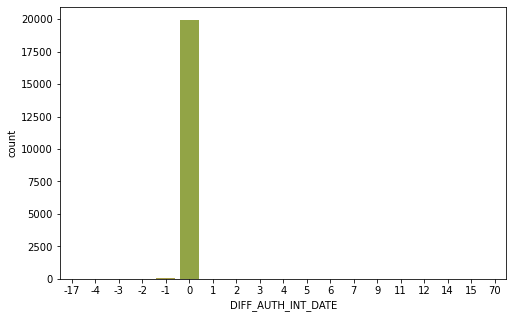

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(df['DIFF_AUTH_INT_DATE'])

In [26]:
df['DIFF_AUTH_INT_DATE'].value_counts()

 0     19926
-1        49
 5         8
 2         4
 3         4
-4         4
-2         3
 1         2
 7         2
 6         1
 4         1
-17        1
 70        1
 15        1
 11        1
 12        1
-3         1
 14        1
 9         1
Name: DIFF_AUTH_INT_DATE, dtype: int64

In [27]:
df['FORECLOSURE'].value_counts()

0    18217
1     1795
Name: FORECLOSURE, dtype: int64

In [28]:
foirdist=df['FOIR'].value_counts()

In [29]:
foirdist


0.49    931
0.39    583
0.59    559
0.54    533
0.48    513
       ... 
1.67      1
6.57      1
4.29      1
3.17      1
5.92      1
Name: FOIR, Length: 410, dtype: int64

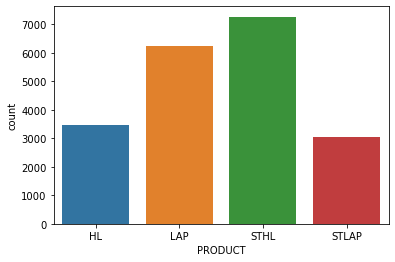

In [30]:
sns.countplot(df['PRODUCT'])

In [31]:
df.drop(['AUTHORIZATIONDATE', 'INTEREST_START_DATE', 'LAST_RECEIPT_DATE'],axis=1,inplace=True)

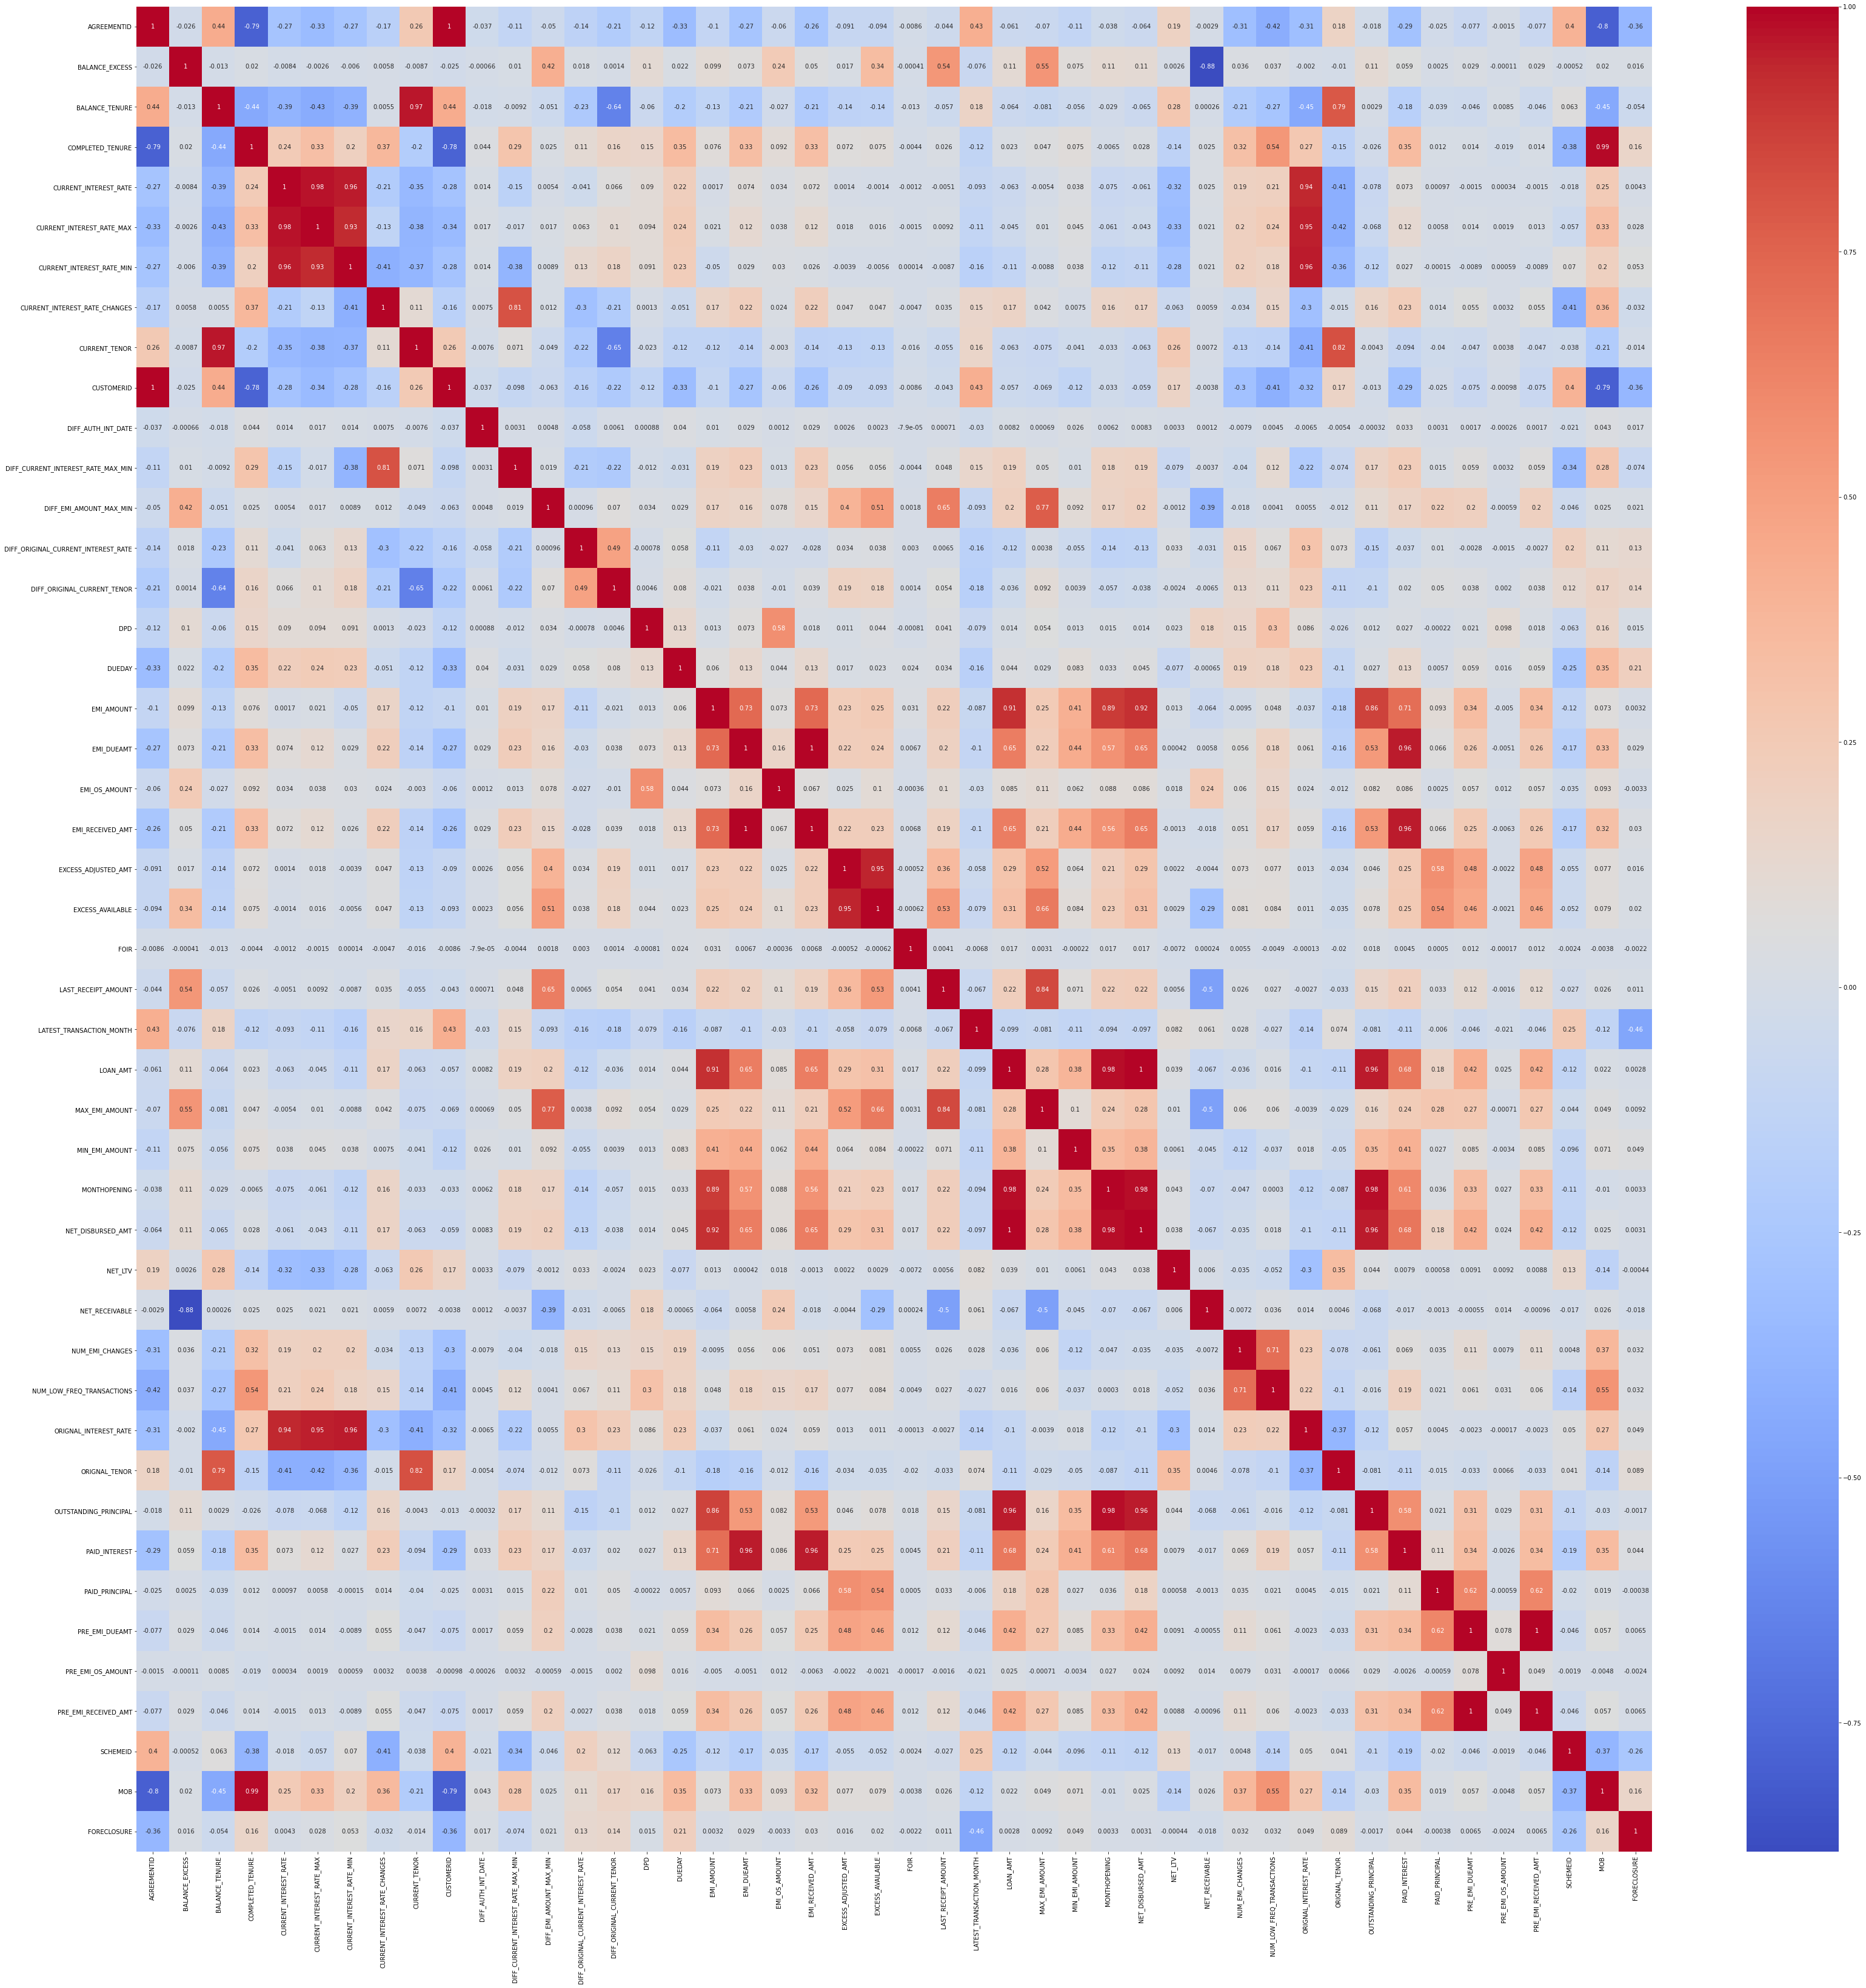

In [32]:
%matplotlib inline 
plt.figure(figsize=(56,56))
sns.heatmap(df.iloc[:].corr(),annot=True,cmap='coolwarm')

In [33]:
x=(df.iloc[:].corr()>=0.95)

In [34]:
print(x)

                                     AGREEMENTID  BALANCE_EXCESS  \
AGREEMENTID                                 True           False   
BALANCE_EXCESS                             False            True   
BALANCE_TENURE                             False           False   
COMPLETED_TENURE                           False           False   
CURRENT_INTEREST_RATE                      False           False   
CURRENT_INTEREST_RATE_MAX                  False           False   
CURRENT_INTEREST_RATE_MIN                  False           False   
CURRENT_INTEREST_RATE_CHANGES              False           False   
CURRENT_TENOR                              False           False   
CUSTOMERID                                  True           False   
DIFF_AUTH_INT_DATE                         False           False   
DIFF_CURRENT_INTEREST_RATE_MAX_MIN         False           False   
DIFF_EMI_AMOUNT_MAX_MIN                    False           False   
DIFF_ORIGINAL_CURRENT_INTEREST_RATE        False

In [35]:
s = x.stack()
corel=s[s].index.tolist()

In [36]:
for i in corel:
    if i[0]!=i[1]:
        print(i)

('AGREEMENTID', 'CUSTOMERID')
('BALANCE_TENURE', 'CURRENT_TENOR')
('COMPLETED_TENURE', 'MOB')
('CURRENT_INTEREST_RATE', 'CURRENT_INTEREST_RATE_MAX')
('CURRENT_INTEREST_RATE', 'CURRENT_INTEREST_RATE_MIN')
('CURRENT_INTEREST_RATE_MAX', 'CURRENT_INTEREST_RATE')
('CURRENT_INTEREST_RATE_MAX', 'ORIGNAL_INTEREST_RATE')
('CURRENT_INTEREST_RATE_MIN', 'CURRENT_INTEREST_RATE')
('CURRENT_INTEREST_RATE_MIN', 'ORIGNAL_INTEREST_RATE')
('CURRENT_TENOR', 'BALANCE_TENURE')
('CUSTOMERID', 'AGREEMENTID')
('EMI_DUEAMT', 'EMI_RECEIVED_AMT')
('EMI_DUEAMT', 'PAID_INTEREST')
('EMI_RECEIVED_AMT', 'EMI_DUEAMT')
('EMI_RECEIVED_AMT', 'PAID_INTEREST')
('LOAN_AMT', 'MONTHOPENING')
('LOAN_AMT', 'NET_DISBURSED_AMT')
('LOAN_AMT', 'OUTSTANDING_PRINCIPAL')
('MONTHOPENING', 'LOAN_AMT')
('MONTHOPENING', 'NET_DISBURSED_AMT')
('MONTHOPENING', 'OUTSTANDING_PRINCIPAL')
('NET_DISBURSED_AMT', 'LOAN_AMT')
('NET_DISBURSED_AMT', 'MONTHOPENING')
('NET_DISBURSED_AMT', 'OUTSTANDING_PRINCIPAL')
('ORIGNAL_INTEREST_RATE', 'CURRENT_INTERE

In [37]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['AGREEMENTID', 'BALANCE_TENURE', 'COMPLETED_TENURE',
        'CURRENT_INTEREST_RATE_CHANGES', 'CURRENT_TENOR', 'DIFF_AUTH_INT_DATE',
        'DIFF_ORIGINAL_CURRENT_TENOR', 'DPD', 'DUEDAY', 'NUM_EMI_CHANGES',
        'NUM_LOW_FREQ_TRANSACTIONS', 'ORIGNAL_TENOR', 'MOB', 'FORECLOSURE'],
       dtype='object'),
 dtype('float64'): Index(['BALANCE_EXCESS', 'CURRENT_INTEREST_RATE', 'CURRENT_INTEREST_RATE_MAX',
        'CURRENT_INTEREST_RATE_MIN', 'CUSTOMERID',
        'DIFF_CURRENT_INTEREST_RATE_MAX_MIN', 'DIFF_EMI_AMOUNT_MAX_MIN',
        'DIFF_ORIGINAL_CURRENT_INTEREST_RATE', 'EMI_AMOUNT', 'EMI_DUEAMT',
        'EMI_OS_AMOUNT', 'EMI_RECEIVED_AMT', 'EXCESS_ADJUSTED_AMT',
        'EXCESS_AVAILABLE', 'FOIR', 'LAST_RECEIPT_AMOUNT',
        'LATEST_TRANSACTION_MONTH', 'LOAN_AMT', 'MAX_EMI_AMOUNT',
        'MIN_EMI_AMOUNT', 'MONTHOPENING', 'NET_DISBURSED_AMT', 'NET_LTV',
        'NET_RECEIVABLE', 'ORIGNAL_INTEREST_RATE', 'OUTSTANDING_PRINCIPAL',
        'PAID_INTEREST', 'P

In [38]:

label_encoder = LabelEncoder()
df['CITY'] = label_encoder.fit_transform(df['CITY'])
df['PRODUCT'] = label_encoder.fit_transform(df['PRODUCT'])
df.drop(['NPA_IN_LAST_MONTH','NPA_IN_CURRENT_MONTH'],axis=1,inplace=True)

In [39]:
df

,AGREEMENTID,BALANCE_EXCESS,BALANCE_TENURE,CITY,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,CURRENT_TENOR,...,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,PRODUCT,SCHEMEID,MOB,FORECLOSURE
0,11220001,0.0,0,146,45,13.421934,13.734072,13.421934,1,45,...,1.164472e+05,2.725723e+06,1.159366e+07,7994.273589,0.0,7994.273589,0,10901100.0,45,1
1,11220002,0.0,99,146,38,13.734072,13.734072,13.734072,0,137,...,1.234760e+07,4.945154e+06,6.942656e+06,100504.575864,0.0,100504.575864,0,10901100.0,38,1
2,11220006,0.0,231,146,81,15.606900,16.231176,15.606900,2,312,...,2.994184e+06,2.990124e+06,9.392115e+05,5947.630536,0.0,5947.630536,0,10901101.0,81,1
3,11220008,0.0,0,224,91,11.236968,13.734072,11.236968,4,91,...,4.295120e+04,4.648994e+06,9.979637e+06,60322.180776,0.0,60322.180776,0,10901100.0,91,1
4,11220010,0.0,215,146,89,14.982624,15.606900,14.982624,2,304,...,7.200653e+06,6.593778e+06,5.552847e+05,27732.787464,0.0,27732.787464,0,10901101.0,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,11253349,0.0,240,187,0,13.421934,13.421934,13.421934,0,240,...,9.251147e+06,1.381342e+04,0.000000e+00,20320.886952,0.0,20320.886952,0,10901104.0,1,0
20008,11253350,0.0,240,90,0,13.109796,13.109796,13.109796,0,240,...,2.299951e+06,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0,10901104.0,0,0
20009,11253351,0.0,96,2,0,15.606900,15.606900,15.606900,0,96,...,2.101814e+07,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,1,10901242.0,0,0
20010,11253353,0.0,60,20,0,15.606900,15.606900,15.606900,0,60,...,6.162378e+07,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,1,10901103.0,0,0


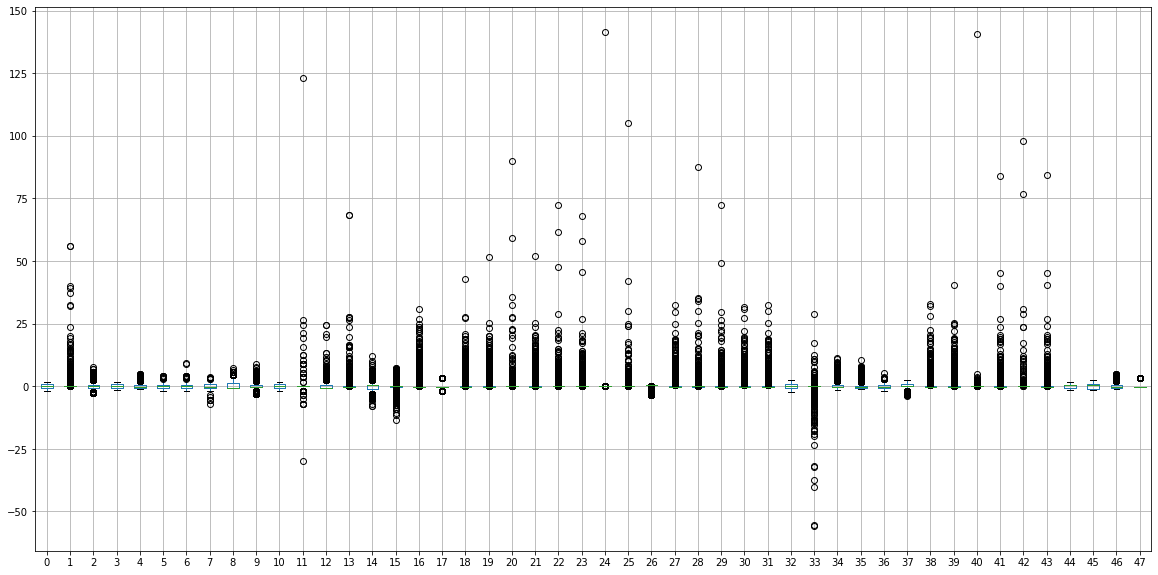

In [40]:
df_copy = df.copy()
scaler = StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df_copy))
plt.figure(figsize=(20,10))
df_scaled.boxplot(vert=True)


In [41]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [42]:
for column in df_copy.columns:
    if df_copy[column].dtype != 'object': 
        lr,ur=remove_outlier(df_copy[column])
        df_copy[column]=np.where(df_copy[column]>ur,ur,df_copy[column])
        df_copy[column]=np.where(df_copy[column]<lr,lr,df_copy[column])

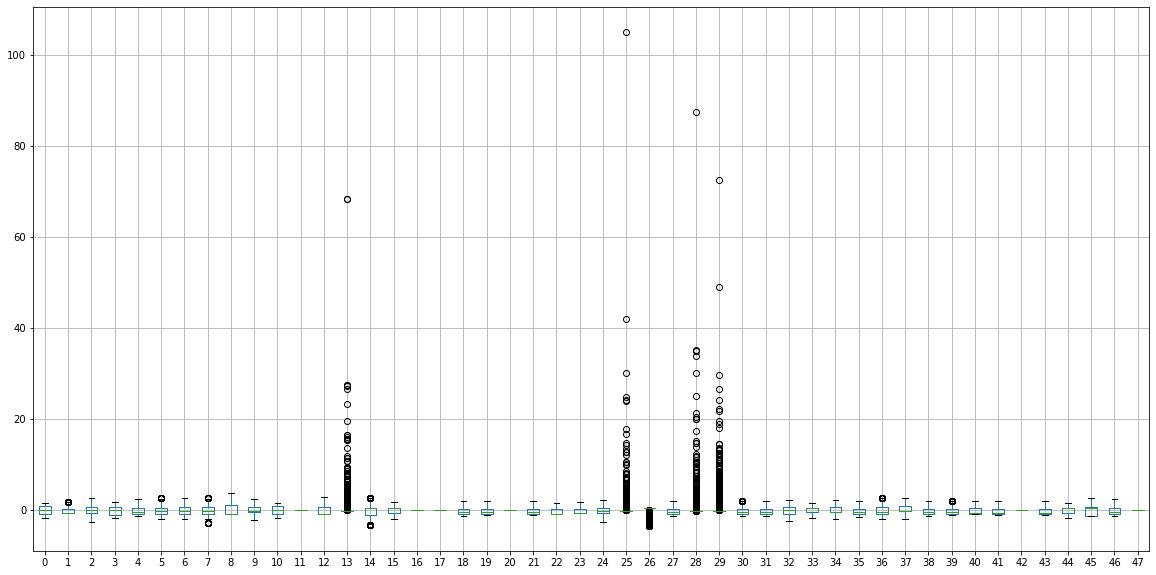

In [43]:
df_scaled=pd.DataFrame(scaler.fit_transform(df_copy))
plt.figure(figsize=(20,10))
df_scaled.boxplot(vert=True)

In [44]:
X=df_copy.drop(['CUSTOMERID','DIFF_EMI_AMOUNT_MAX_MIN','LAST_RECEIPT_AMOUNT','LATEST_TRANSACTION_MONTH',
           'MAX_EMI_AMOUNT','MIN_EMI_AMOUNT','SCHEMEID','FORECLOSURE'],axis=1)
y = df_copy['FORECLOSURE']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16009 entries, 2676 to 235
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   AGREEMENTID                          16009 non-null  float64
 1   BALANCE_EXCESS                       16009 non-null  float64
 2   BALANCE_TENURE                       16009 non-null  float64
 3   CITY                                 16009 non-null  float64
 4   COMPLETED_TENURE                     16009 non-null  float64
 5   CURRENT_INTEREST_RATE                16009 non-null  float64
 6   CURRENT_INTEREST_RATE_MAX            16009 non-null  float64
 7   CURRENT_INTEREST_RATE_MIN            16009 non-null  float64
 8   CURRENT_INTEREST_RATE_CHANGES        16009 non-null  float64
 9   CURRENT_TENOR                        16009 non-null  float64
 10  DIFF_AUTH_INT_DATE                   16009 non-null  float64
 11  DIFF_CURRENT_INTEREST_RATE_

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
rfcl=RandomForestClassifier()
rfcl.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
from sklearn.feature_selection import SelectFromModel
smf=SelectFromModel(rfcl,threshold=-np.inf, max_features=15 )
smf.fit(X_train,y_train.values.ravel())
feature_idx=smf.get_support()
feature_name=X_train.columns[feature_idx]
feature_name

Index(['AGREEMENTID', 'BALANCE_EXCESS', 'BALANCE_TENURE', 'CITY',
       'COMPLETED_TENURE', 'CURRENT_INTEREST_RATE',
       'CURRENT_INTEREST_RATE_MAX', 'CURRENT_INTEREST_RATE_MIN',
       'CURRENT_INTEREST_RATE_CHANGES', 'CURRENT_TENOR', 'DIFF_AUTH_INT_DATE',
       'DIFF_CURRENT_INTEREST_RATE_MAX_MIN',
       'DIFF_ORIGINAL_CURRENT_INTEREST_RATE', 'DIFF_ORIGINAL_CURRENT_TENOR',
       'DPD'],
      dtype='object')

In [49]:
len(df_copy.columns)

48

In [50]:
col=df.columns

In [51]:
col[13]

'DIFF_EMI_AMOUNT_MAX_MIN'

In [52]:
col[25]

'LAST_RECEIPT_AMOUNT'

In [53]:
df_copy[['AGREEMENTID','BALANCE_EXCESS']]

,AGREEMENTID,BALANCE_EXCESS
0,11220001.0,0.0
1,11220002.0,0.0
2,11220006.0,0.0
3,11220008.0,0.0
4,11220010.0,0.0
...,...,...
20007,11253349.0,0.0
20008,11253350.0,0.0
20009,11253351.0,0.0
20010,11253353.0,0.0


### CLUSTERING

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
Z=StandardScaler()
df_c=df_copy[[ 'BALANCE_EXCESS', 'BALANCE_TENURE', 'CITY',
       'COMPLETED_TENURE', 'CURRENT_INTEREST_RATE','FORECLOSURE']]
scaled_df=Z.fit_transform(df_c)


In [55]:
wardlink = linkage(scaled_df, method = 'ward')

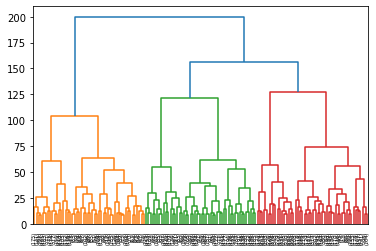

In [56]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 150,
                 )







In [57]:
from scipy.cluster.hierarchy import fcluster

In [58]:
#Method 1

clusters = fcluster(wardlink,4, criterion='maxclust')
clusters

array([2, 2, 4, ..., 4, 4, 4], dtype=int32)

In [59]:
# Method 2

clusters = fcluster(wardlink, 150, criterion='distance')
clusters

array([2, 2, 3, ..., 3, 3, 3], dtype=int32)

In [60]:
df_hc=df_c.copy(deep=True)
df_hc['clusters_hierarchical'] = clusters

In [61]:
df_copy.head()

,AGREEMENTID,BALANCE_EXCESS,BALANCE_TENURE,CITY,COMPLETED_TENURE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_MIN,CURRENT_INTEREST_RATE_CHANGES,CURRENT_TENOR,...,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRE_EMI_DUEAMT,PRE_EMI_OS_AMOUNT,PRE_EMI_RECEIVED_AMT,PRODUCT,SCHEMEID,MOB,FORECLOSURE
0,11220001.0,0.0,16.0,146.0,45.0,13.421934,13.734072,13.421934,1.0,73.0,...,1.164472e+05,1.800672e+06,694324.911443,7994.273589,0.0,7994.273589,0.0,10901100.0,45.0,0.0
1,11220002.0,0.0,99.0,146.0,38.0,13.734072,13.734072,13.734072,0.0,137.0,...,9.234630e+06,1.800672e+06,694324.911443,72544.583613,0.0,72380.874696,0.0,10901100.0,38.0,0.0
2,11220006.0,0.0,231.0,146.0,53.5,15.606900,16.231176,15.606900,2.0,312.0,...,2.994184e+06,1.800672e+06,694324.911443,5947.630536,0.0,5947.630536,0.0,10901101.0,54.5,0.0
3,11220008.0,0.0,16.0,224.0,53.5,11.236968,13.734072,11.236968,4.0,91.0,...,4.295120e+04,1.800672e+06,694324.911443,60322.180776,0.0,60322.180776,0.0,10901100.0,54.5,0.0
4,11220010.0,0.0,215.0,146.0,53.5,14.982624,15.606900,14.982624,2.0,304.0,...,7.200653e+06,1.800672e+06,555284.697909,27732.787464,0.0,27732.787464,0.0,10901101.0,54.5,0.0


In [62]:
df_hc.to_csv(r"E:\AIMLGLIM\Capstone\LD_BFSI_01 - NBFC Foreclosure\h_cluster.csv")

In [63]:
wss=[]
sscore=[]
KM = KMeans(n_clusters=1)
KM.fit(scaled_df)
KM.inertia_
KM.labels_
wss.append(KM.inertia_)

In [64]:
for i in range(2,15):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    labels = KM.labels_
    wss.append(KM.inertia_)
    sscore.append(silhouette_score(scaled_df,labels))

In [65]:
len(wss)

14

In [66]:
wss

[100060.00000000015,
 75640.36378826627,
 61323.39683819627,
 52960.9921175639,
 47569.56421775655,
 42633.638363713144,
 39601.00706038308,
 37149.67323638075,
 35098.60766306946,
 33205.56745873768,
 31375.99048978391,
 30136.53447279696,
 28820.404901377467,
 27619.305589719996]

Text(0, 0.5, 'WSS - Sum of Sq.distances')

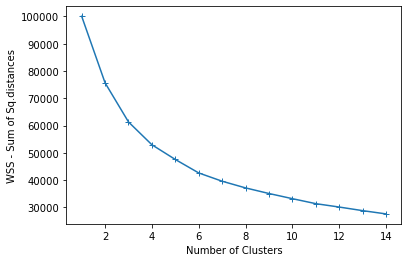

In [67]:
plt.plot(range(1,15), wss,marker="+")
plt.xlabel("Number of Clusters")
plt.ylabel("WSS - Sum of Sq.distances")

ValueError: x and y must have same first dimension, but have shapes (28,) and (13,)

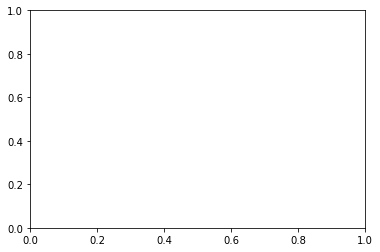

In [68]:
plt.plot(range(2,30), sscore,marker="^") # Silhoutte score plot (Y axis) vs Number of Clusters (X axis)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Score")

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
KM = KMeans(n_clusters=4)
KM.fit(scaled_df)
labels = KM.labels_
silhouette_score(scaled_df,labels)

In [ ]:
sil_width=silhouette_samples(scaled_df,labels)

In [ ]:
df_c["sil_width"]=sil_width

In [ ]:
df_c["Clus_kmeans"] = labels
df_c.head(5)

In [ ]:
df_c.to_csv('km.csv')

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [72]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [73]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print("\n \n")
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[16009]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16009

    accuracy                           1.00     16009
   macro avg       1.00      1.00      1.00     16009
weighted avg       1.00      1.00      1.00     16009

